## A Simple Recommender System in Python

In this project, I have tried to built a simple recommendation system in python.

### What is a recommender system?

A recommender system is a simple algorithm used to provide the most relevant information to a user by discovering patterns in a dataset. The algorithm rates the items and shows the user the items that they would rate highly. An example of recommendation in action is when you visit **Amazon** and you notice that some **movies** are being recommended to you or when **Netflix** recommends certain movies to you. They are also used by Music streaming applications such as Spotify and Deezer to recommend music that you might like.

### Different types of recommendation engines

There two main types of recommendation systems are **content based** and **collaborative** filtering recommender system. 

#### Collaborative Filtering:

* The behavior of a group of users is used to make recommendations to other users. Recommendation is based on the preference of other users.
* A simple example would be recommending a movie to a user based on the fact that their friend liked the movie.

There are two types of Collabrative models:

1. Memory-based methods:

* Memory-based techniques are simple to implement and the resulting recommendations are often easy to explain. They are divided into two further categories.

- User-based collaborative filtering: In this model products are recommended to a user based on the fact that the products have been liked by users similar to the user.

- Item-based collaborative filtering: These systems identify similar items based on users’ previous ratings.

2. Model-based methods: 

* Model-based methods are based on matrix factorization and are better at dealing with sparsity. They are developed using data mining, machine learning algorithms to predict users’ rating of unrated items. 
* In this approach techniques such as dimensionality reduction are used to improve the accuracy.

### Content based Filtering

It uses meta data such as genre, producer, actor, musician to recommend items say movies or music. Such a recommendation would be for instance recommending Infinity War that featured Vin Disiel because someone watched and liked The Fate of the Furious.

#### Datasets used for building recommender systems

In this project, the data is used from [MovieLens Dataset](https://grouplens.org/datasets/movielens/). This dataset was put together by the Grouplens research group at the University of Minnesota. It contains 1, 10, and 20 million ratings. Movielens also has a website where you can sign up, contribute reviews and get movie recommendations. You can find more datasets for various data science task from Dataquest’s data resource.

Lets start building a simple recommendation system in python.

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [67]:
# read movie csv file
movie = pd.read_csv('movies.csv')
print(movie.shape)
movie.head()

(27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
# read ratings csv file
rating = pd.read_csv('ratings.csv')
rating = rating[:100003]
print(rating.shape)
rating.head()

(100003, 4)


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


Since the movieId columns are the same we can merge these datasets on this column.

In [71]:
df = pd.merge(movie, rating, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [72]:
df.shape

(100003, 6)

**Let’s look at what each column represents:**
- userId - the ID of the user who rated the movie.
- movieId - the ID of the movie.
- rating - The rating the user gave the movie, between 1 and 5.
- timestamp - The time the movie was rated.
- title - The title of the movie.

In [73]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean()).reset_index()
ratings.head()

,title,rating
0,"""Great Performances"" Cats (1998)",3.000000
1,'Hellboy': The Seeds of Creation (2004),2.500000
2,'Neath the Arizona Skies (1934),3.500000
3,'Round Midnight (1986),4.000000
4,'Til There Was You (1997),2.333333


In [74]:
ratings['number_of_ratings'] = list(df.groupby('title')['rating'].count().astype(int))

In [75]:
ratings.head()

,title,rating,number_of_ratings
0,"""Great Performances"" Cats (1998)",3.000000,1
1,'Hellboy': The Seeds of Creation (2004),2.500000,1
2,'Neath the Arizona Skies (1934),3.500000,1
3,'Round Midnight (1986),4.000000,1
4,'Til There Was You (1997),2.333333,3


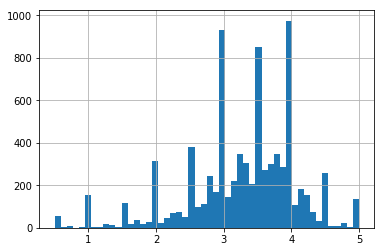

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

Let’s now plot a Histogram using pandas plotting functionality to visualize the distribution of the ratings

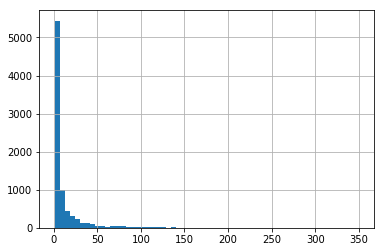

In [77]:
ratings['number_of_ratings'].hist(bins=60)

We can see that most of the movies are rated between 2.5 and 4. Next let’s visualize the number_of_ratings column in as similar manner.

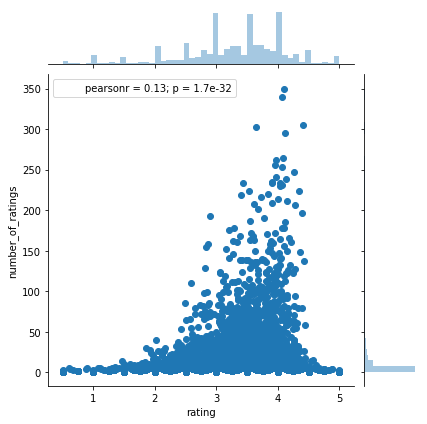

In [78]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

From the diagram we can see that their is a positive relationship between the average rating of a movie and the number of ratings. The graph indicates that the more the ratings a movie gets the higher the average rating it gets. This is important to note especially when choosing the threshold for the number of ratings per movie.

Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system. We use pandas sort_values utility and set ascending to false in order to arrange the movies from the most rated. We then use the head() function to view the top 10.

In [79]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,title,rating,number_of_ratings
5885,Pulp Fiction (1994),4.100000,350
2724,Forrest Gump (1994),4.058824,340
6553,"Shawshank Redemption, The (1994)",4.413115,305
3967,Jurassic Park (1993),3.639073,302
6620,"Silence of the Lambs, The (1991)",4.111864,295
6907,Star Wars: Episode IV - A New Hope (1977),4.083333,264
1115,Braveheart (1995),3.965649,262
7244,Terminator 2: Judgment Day (1991),3.953125,256
4710,"Matrix, The (1999)",4.063241,253
6398,Schindler's List (1993),4.263158,247


In [140]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()


title,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Mr. Brooks (2007),"Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr. (1999)",Mr. Deeds (2002),Mr. Deeds Goes to Town (1936),Mr. Destiny (1990),Mr. Holland's Opus (1995),Mr. Jealousy (1997),Mr. Jones (1993),Mr. Magoo (1997),Mr. Magorium's Wonder Emporium (2007)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


Let’s assume that a user has watched Air Force One (1997) and Contact (1997). We would like like to recommend movies to this user based on this watching history. The goal is to look for movies that are similar to Contact (1997) and Air Force One (1997 which we shall recommend to this user. We can achieve this by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the dataset. The first step is to create a dataframe with the ratings of these movies from our movie_matrix.

In [141]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In order to compute the correlation between two dataframes we use pandas corwith functionality. Corrwith computes the pairwise correlation of rows or columns of two dataframe objects. Let's use this functionality to get the correlation between each movie's rating and the ratings of the Air Force One movie.

In [142]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

As noticed earlier our matrix had very many missing values since not all the movies were rated by all the users. We therefore drop those null values and transform correlation results into dataframes to make the results look more appealing.

In [178]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation']).reset_index()
corr_contact.dropna(inplace=True)
corr_contact.head()

,title,Correlation
4,'Til There Was You (1997),1.000000
5,"'burbs, The (1989)",0.144338
7,(500) Days of Summer (2009),-1.000000
9,*batteries not included (1987),0.385922
14,10 Things I Hate About You (1999),0.082269


In [179]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation']).reset_index()
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,title,correlation
4,'Til There Was You (1997),1.000000
5,"'burbs, The (1989)",0.679900
7,(500) Days of Summer (2009),-1.000000
9,*batteries not included (1987),0.522233
14,10 Things I Hate About You (1999),0.263967


These two dataframes above show us the movies that are most similar to Contact (1997) and Air Force One (1997) movies respectively. However we have a challenge in that some of the movies have very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating. We can fix this by setting a threshold for the number of ratings. From the histogram earlier we saw a sharp decline in number of ratings from 100. We shall therefore set this as the threshold, however this is a number you can play around with until you get a suitable option. In order to do this we need to join the two dataframes with the number_of_ratings column in the ratings dataframe.

In [180]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()

,title,correlation,number_of_ratings
4,'Til There Was You (1997),1.000000,3
5,"'burbs, The (1989)",0.679900,14
7,(500) Days of Summer (2009),-1.000000,26
9,*batteries not included (1987),0.522233,6
14,10 Things I Hate About You (1999),0.263967,46


In [146]:
corr_contact.head()

,title,Correlation,number_of_ratings
4,'Til There Was You (1997),1.000000,3
5,"'burbs, The (1989)",0.679900,14
7,(500) Days of Summer (2009),-1.000000,26
9,*batteries not included (1987),0.522233,6
14,10 Things I Hate About You (1999),0.263967,46


We shall now obtain the movies that are most similar to Air Force One (1997) by limiting them to movies that have at least 100 reviews. We then sort them by the correlation column and view the first 10.

In [165]:
output = corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False)
output.head()

,title,correlation,number_of_ratings
699,Batman Forever (1995),0.689196,155
2236,E.T. the Extra-Terrestrial (1982),0.636933,158
2820,"Fugitive, The (1993)",0.614315,233
1529,Clear and Present Danger (1994),0.605776,138
3426,Home Alone (1990),0.592595,141


The most similar movie to Air Force One (1997) is Batman Forever (1995) with a correlation of 0.689. Clearly by changing the threshold for the number of reviews we get different results from the previous way of doing it. Limiting the number of rating gives us better results and we can confidently recommend the above movies to someone who has watched Air Force One (1997).

In [181]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,title,Correlation,number_of_ratings
1529,Clear and Present Danger (1994),0.596272,138
3426,Home Alone (1990),0.493913,141
3955,Jumanji (1995),0.486804,112
855,Big (1988),0.435989,104
917,"Birdcage, The (1996)",0.435431,102
608,Back to the Future Part III (1990),0.427634,112
172,Ace Ventura: When Nature Calls (1995),0.424461,110
4850,Minority Report (2002),0.422713,101
2236,E.T. the Extra-Terrestrial (1982),0.419196,158
699,Batman Forever (1995),0.411259,155


Once again we get different results. The most similar movie to Contact (1997) is Clear and Present Danger (1994)) with a correlation coefficient of 0.596 with 138 ratings. So if somebody liked Contact (1997) we can recommend the above movies to them.